In [1]:
from gse_tools.GSEs import GSEs

In [2]:
filepath="./../data/GSE10245_family.soft.gz"
gse = GSEs(file_path=filepath)

06-Dec-2022 22:42:59 INFO GEOparse - Parsing ./../data/GSE10245_family.soft.gz: 
06-Dec-2022 22:42:59 DEBUG GEOparse - DATABASE: GeoMiame
06-Dec-2022 22:42:59 DEBUG GEOparse - SERIES: GSE10245
06-Dec-2022 22:42:59 DEBUG GEOparse - PLATFORM: GPL570
c:\Disk\Coding\anaconda3\lib\site-packages\GEOparse\GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258551
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258552
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258553
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258554
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258555
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258556
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258557
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258558
06-Dec-2022 22:43:00 DEBUG GEOparse - SAMPLE: GSM258559
06-Dec-2022 22:43:0

In [3]:
gse.set_seed(575) # set the seed for reproducibility
#(i) train the model on all the data and compute the accuracy of the model on that data
gse.train_model().predict(testOnTrain=True).str_accuracy()

Accuracy of prediction on test on training data: 89.6552%


In [4]:
#(ii) train the model on half of the data and compute the accuracy of the model on that data
gse.train_model(n_clusters=2,train_frac=0.5).predict(testOnTrain=True).str_accuracy() 

Accuracy of prediction on test on training data: 93.1034%


In [5]:
#(iii) compute the model accuracy built at point (ii) on the other half of the data (test data)
gse.train_model(n_clusters=2, train_frac=0.5).predict().str_accuracy() 

Accuracy of prediction on test on data other than training (fraction: 0.5): 96.5517%


In [18]:
# output for load the data
print("Note: the data is transposed so that the rows are the oberservations and the columns are the features")
print(f"the number of oberservations is {gse.matrix.shape[0]} and the number of features is {gse.matrix.shape[1]}")
print("__"*40)
print("The frist 4 rows of the data")
print(gse.matrix.head(4))

Note: the data is transposed so that the rows are the oberservations and the columns are the features
the number of oberservations is 58 and the number of features is 54675
________________________________________________________________________________
The frist 4 rows of the data
ID_REF     1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at  \
name                                                                      
GSM258551   9.129905  8.034022  3.564520  4.746490   2.320698  5.519153   
GSM258552   9.843349  7.973332  4.994852  5.197306   2.248520  5.081258   
GSM258553   9.730661  8.834045  5.066018  5.234618   2.259504  4.657257   
GSM258554   9.032165  7.723965  4.958580  6.078180   2.262787  4.535683   

ID_REF      1316_at   1320_at  1405_i_at   1431_at  ...  \
name                                                ...   
GSM258551  3.339182  2.775395   8.303437  2.981327  ...   
GSM258552  2.934516  2.617097   9.145519  4.619668  ...   
GSM258553  3.007192  2.634559 

In [19]:
# cluster and subtype dataframes
print("The cluster dataframe")
print(gse.accuracy_matrix.head(4))

The cluster dataframe
           cluster_number characteristics_ch1.0.disease state  \
GSM258551               1                      adenocarcinoma   
GSM258559               1                      adenocarcinoma   
GSM258562               0             squamous cell carcinoma   
GSM258563               0             squamous cell carcinoma   

                        prediction  
GSM258551           adenocarcinoma  
GSM258559           adenocarcinoma  
GSM258562  squamous cell carcinoma  
GSM258563  squamous cell carcinoma  


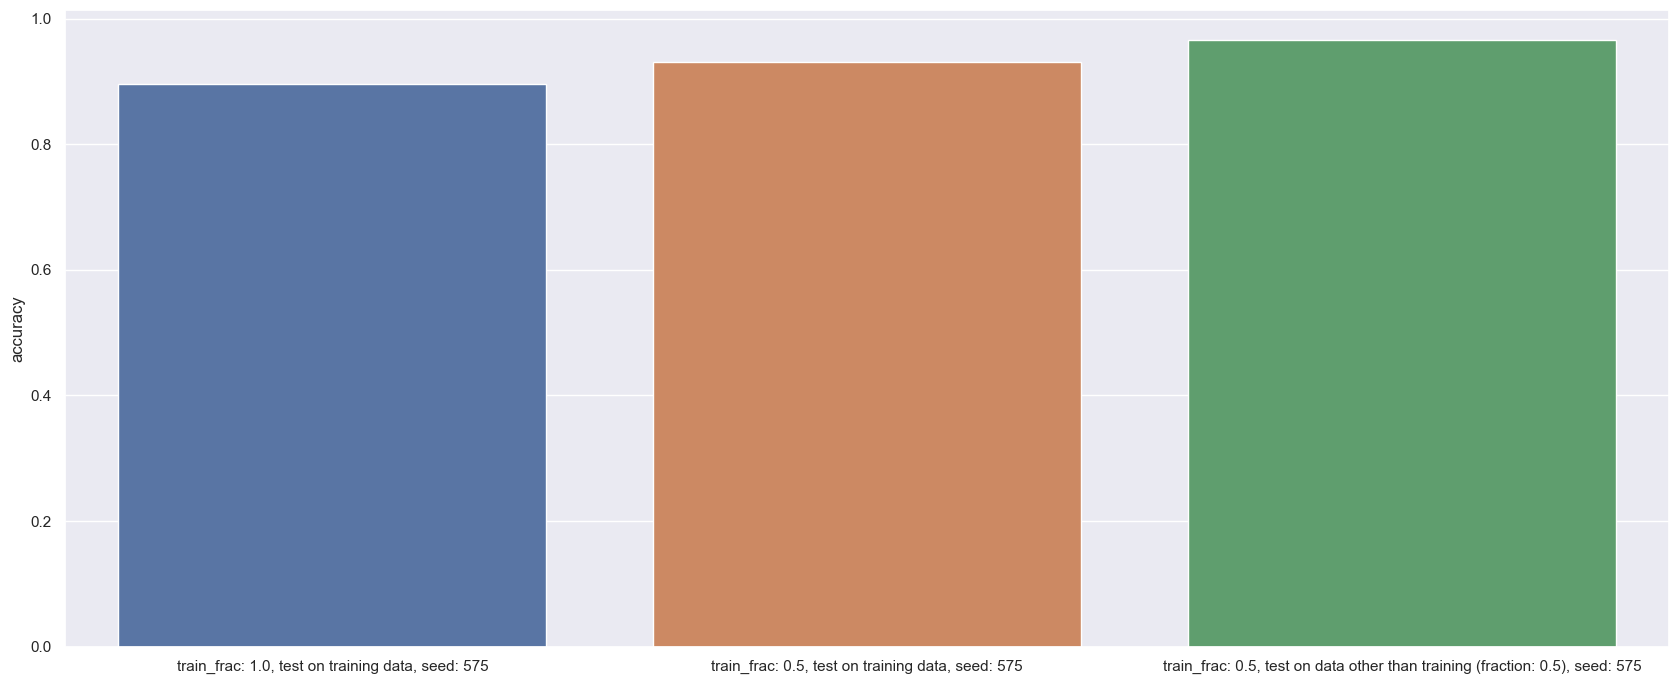

In [6]:
# plot the accuracy
gse.barplot_accuracy()

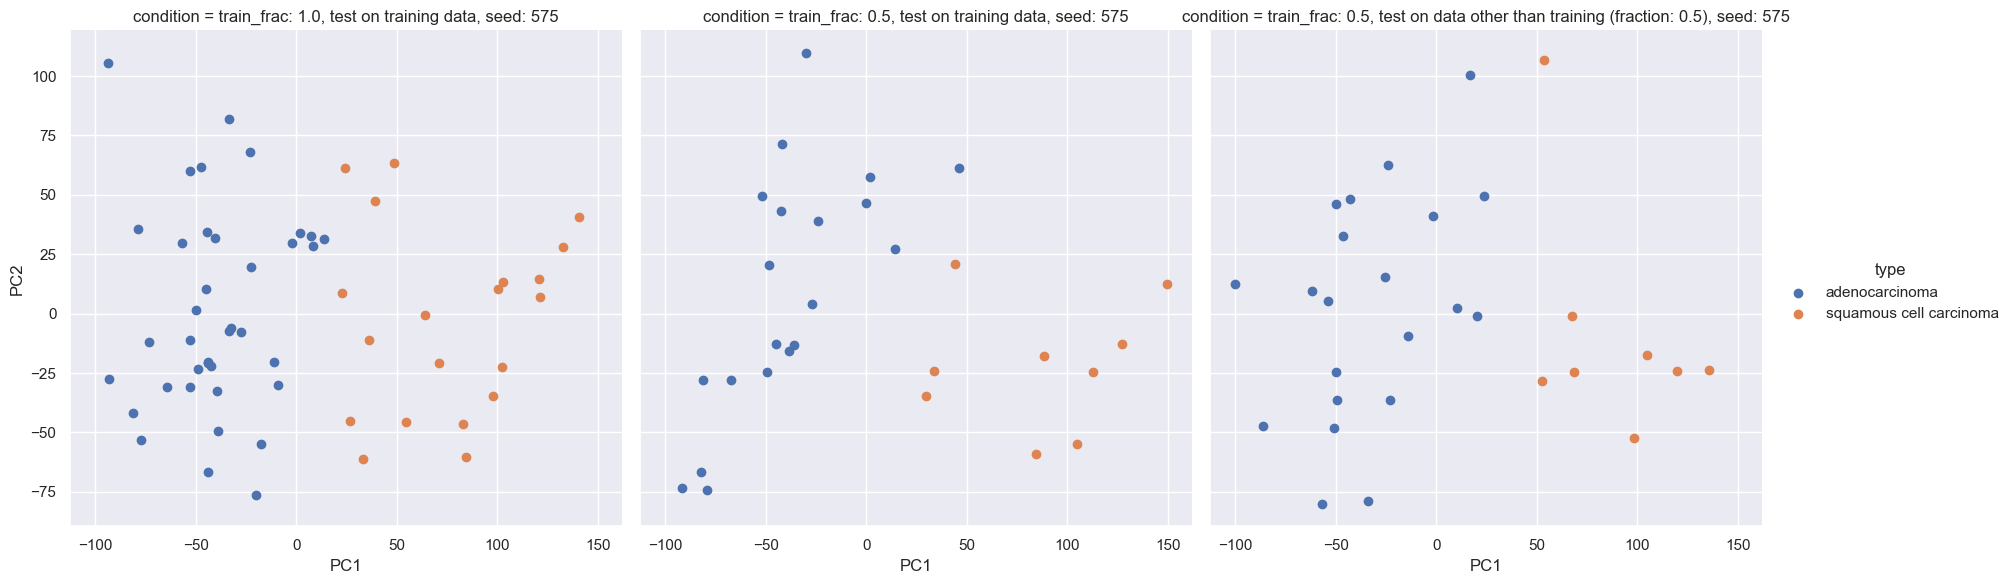

In [7]:
# bonus pca plot
gse.scatter_pca()